In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Latestv2.csv")

In [0]:
X = df.drop(["new_failure", "date", "serial_number","model"], axis=1)
y = df["new_failure"]

In [0]:
seed = 7

In [0]:
# prepare models
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier


models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoost', GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))



In [0]:
results = []
names = []
scoring = 'roc_auc'

In [0]:
from sklearn.model_selection import StratifiedKFold
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.454086 (0.041420)
KNN: 0.926011 (0.014645)
DT: 0.925607 (0.019397)
NB: 0.609976 (0.023149)
AdaBoost: 0.777740 (0.042170)
GradientBoost: 0.867159 (0.036002)
XGB: 0.819648 (0.030103)


In [0]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

results = []
names = []
scoring = 'roc_auc'

In [7]:
name = "LR"
model = LogisticRegression(solver='lbfgs')
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

LR: 0.454086 (0.041420)


In [8]:
name = "KNN"
model = KNeighborsClassifier()
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

KNN: 0.926011 (0.014645)


In [9]:
name = "DT"
model = DecisionTreeClassifier()
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

DT: 0.925712 (0.019449)


In [10]:
name = "NB"
model = GaussianNB()
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

NB: 0.609976 (0.023149)


In [11]:
name = "AdaBoost"
model = AdaBoostClassifier()
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

AdaBoost: 0.777740 (0.042170)


In [12]:
name = "GradientBoost"
model = GradientBoostingClassifier()
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=7)
cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())	
print(msg)

GradientBoost: 0.867159 (0.036002)


In [13]:
name = "XGB"
model = xgb.XGBClassifier()
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=7)
cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

XGB: 0.819648 (0.030103)


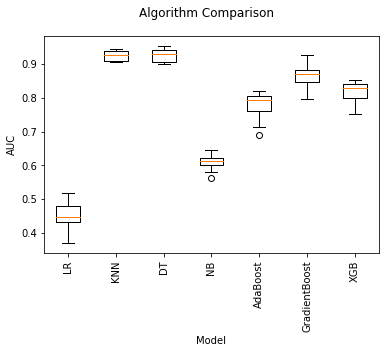

In [14]:
# boxplot algorithm comparison
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation='vertical')
plt.xlabel("Model")
plt.ylabel("AUC")
plt.show()

In [0]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())